In [115]:
import pandas as pd;
import seaborn as sb;
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
#import tensorflow as tf
#print("TensorFlow version:", tf.__version__)

#from keras.layers import Dense, Flatten, Conv2D
#from keras import Model

In [116]:
df = pd.read_csv('uploaded.csv')
df_top = df.head()
df

geolocator = Nominatim(user_agent="MapAPI")
location = geolocator.geocode("500 S GOODWIN AVE ,URBANA,IL")
print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

#Check the data types of the columns




The latitude of the location is:  40.1080112
The longitude of the location is:  -88.22252800649827


<AxesSubplot:>

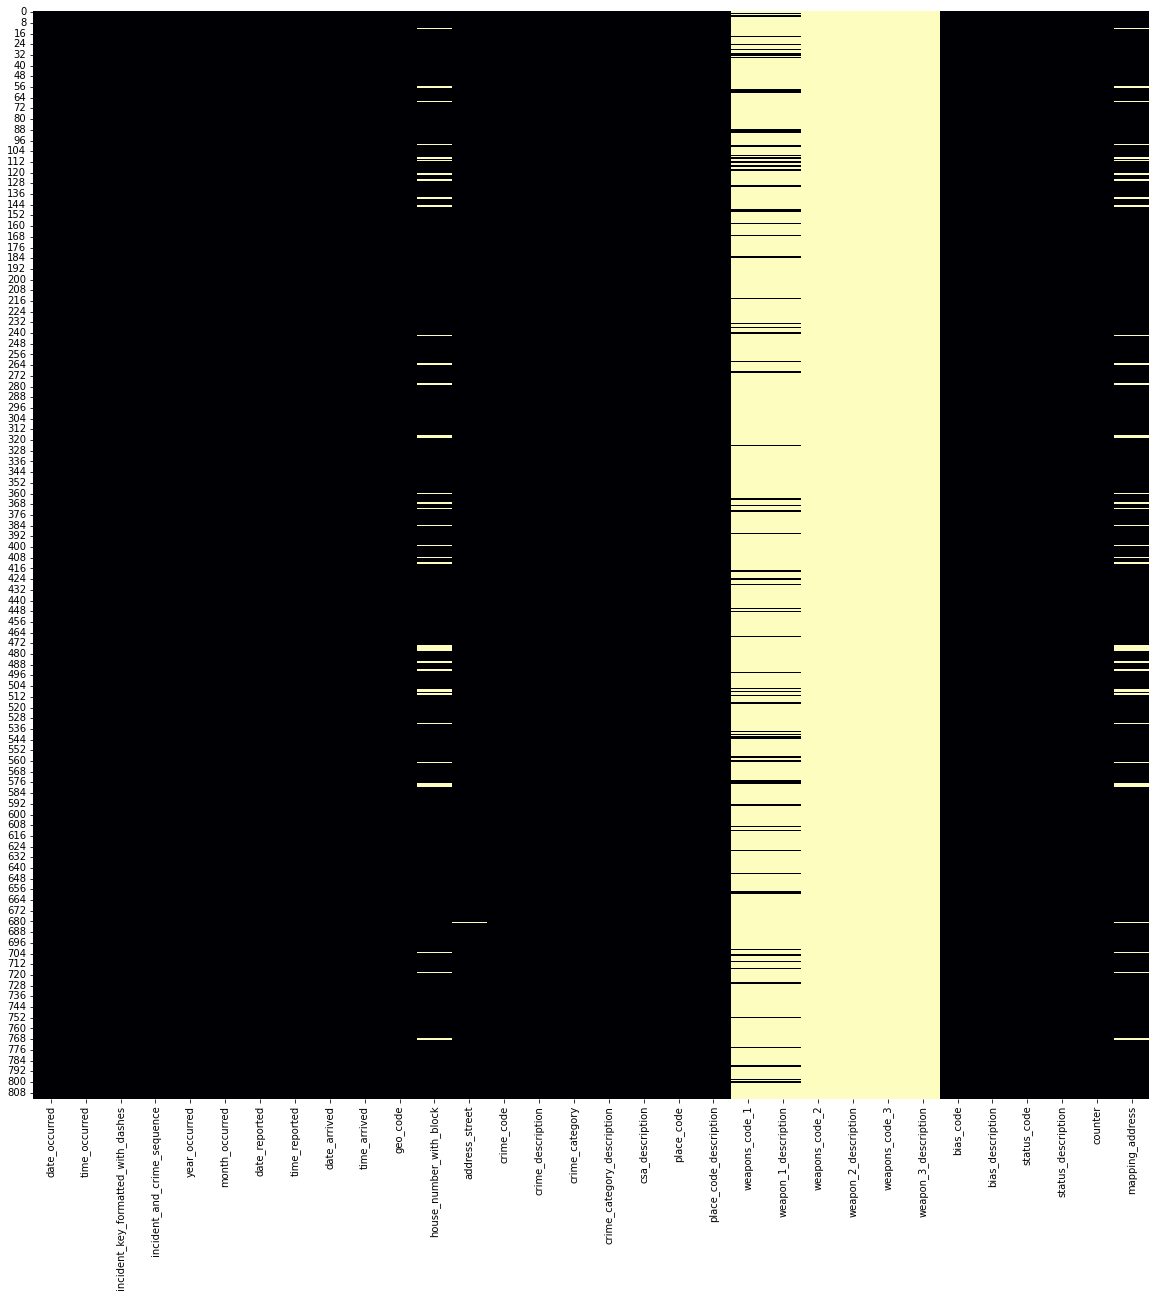

In [117]:
#Generated heat map to check for null values but data set might be too large
plt.figure(figsize=(20,20))
sb.heatmap(df.isnull(), cbar = False, cmap='magma')

In [118]:
# Shows that we have null values in our dataset which we need to clean
null_values = df.isnull().sum()
null_values

date_occurred                           0
time_occurred                           0
incident_key_formatted_with_dashes      0
incident_and_crime_sequence             0
year_occurred                           0
month_occurred                          0
date_reported                           0
time_reported                           0
date_arrived                            0
time_arrived                            0
geo_code                                0
house_number_with_block                40
address_street                          1
crime_code                              0
crime_description                       0
crime_category                          0
crime_category_description              0
csa_description                         0
place_code                              0
place_code_description                  0
weapons_code_1                        738
weapon_1_description                  738
weapons_code_2                        813
weapon_2_description              

In [119]:
print (df.shape)
row = df.shape[0]
col = df.shape[1]

#for i in range(row):

    #for j in range(col):
        #if (j == "Date Reported"):
#Null values are gone, every row that had at least one was dropped
# df = df.dropna()
# print(df.shape)

(813, 32)


In [120]:
#Data set looks clear but there needs to be changes to use it in tensorflow. Right now we just have
#objects in our columns but we need numbers so the ML model can assign weights to the DeepLayers. Need to discuss this
# df_clean = df.dropna(how="any")
# tmp = df_clean.isnull().sum()
# tmp
# df_clean.shape

In [121]:
#This code adds in a new column with the latitude and longitude of the address
lat = []
long = []
i = 0

for address in df["mapping_address"]:
        geolocator = Nominatim(user_agent="MapAPI")
        location = geolocator.geocode(address)
        if location is None:
            lat.append(None)
            long.append(None)
        else:
            lat.append(location.latitude)
            long.append(location.longitude)
print(lat)
    


[40.1098117, 40.115082, 40.115082, 40.115082, 40.115082, 40.087106, 40.1122318, 40.1122318, 40.1122318, 40.1122318, 40.120483, 40.120483, 46.3144754, 40.11769715, 40.098366, 40.100614, 40.11644, 40.11644, 40.115082, 40.1083, 40.102958, 40.10361130270692, 40.1238, 40.10576428391621, 40.091355, 40.1238, 40.110724, 40.113642, 40.1238, 40.111629, 40.111629, 40.110886, 40.110886, 40.110886, 40.091562, 40.09963026174496, 40.09963026174496, 40.120131995991855, 40.1104918, 40.1104918, 40.1104918, None, 40.115611, 40.115611, 40.093723, 40.115611, 40.115611, 40.1104918, 40.1104918, 40.115611, 40.115611, 40.115611, 40.116488, 40.104403, 40.104403, 40.104403, 46.3144754, 40.109193, 40.10569, 40.10569, 40.10569, 40.093165, 40.10564, 40.115611, 40.115611, 40.1163843, 40.11838, 46.3144754, 40.112351, 40.103697, 40.112631, None, 40.1347341, 40.115082, 40.1163843, 40.0925902, 40.0925902, 40.1200528, 40.1200528, 40.1200528, 40.1200528, 40.1200528, 40.1200528, 40.11769715, 40.11769715, 40.115082, 40.1150

In [122]:
df["Latitude"] = lat
df["Longitude"] = long
df.head()

,date_occurred,time_occurred,incident_key_formatted_with_dashes,incident_and_crime_sequence,year_occurred,month_occurred,date_reported,time_reported,date_arrived,time_arrived,...,weapons_code_3,weapon_3_description,bias_code,bias_description,status_code,status_description,counter,mapping_address,Latitude,Longitude
0,12/01/2019,00:19,W19-01382,W19-01382_1,2019,12,12/01/2019,00:19,12/01/2019,00:19,...,NaN,NaN,88,NONE,11,TRAFFIC WARNING TICKET,1,"1 VINE ,URBANA,IL",40.109812,-88.204638
1,12/01/2019,00:23,U19-06073,U19-06073_1,2019,12,12/01/2019,00:27,12/01/2019,00:30,...,NaN,NaN,88,NONE,3,CLEARED BY ADULT ARREST,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283
2,12/01/2019,00:23,U19-06073,U19-06073_2,2019,12,12/01/2019,00:27,12/01/2019,00:30,...,NaN,NaN,88,NONE,3,CLEARED BY ADULT ARREST,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283
3,12/01/2019,00:23,U19-06073,U19-06073_3,2019,12,12/01/2019,00:27,12/01/2019,00:30,...,NaN,NaN,88,NONE,3,CLEARED BY ADULT ARREST,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283
4,12/01/2019,00:23,U19-06073,U19-06073_4,2019,12,12/01/2019,00:27,12/01/2019,00:30,...,NaN,NaN,88,NONE,3,CLEARED BY ADULT ARREST,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283


In [128]:
df = df.drop(['incident_key_formatted_with_dashes','incident_and_crime_sequence','month_occurred', 'date_arrived','time_arrived','crime_code','crime_category','place_code','weapons_code_1','weapon_1_description','weapons_code_2','weapon_2_description','weapons_code_3','weapon_3_description','bias_code','bias_description','status_code','status_description'], axis = 1)

,date_occurred,time_occurred,year_occurred,date_reported,time_reported,geo_code,house_number_with_block,address_street,crime_description,crime_category_description,csa_description,place_code_description,counter,mapping_address,Latitude,Longitude
0,12/01/2019,00:19,2019,12/01/2019,00:19,576-01,1 BLOCK,VINE,TRAFFIC SIGN VIOLATION,Traffic Offenses,COMMITTED,STREET,1,"1 VINE ,URBANA,IL",40.109812,-88.204638
1,12/01/2019,00:23,2019,12/01/2019,00:27,519-07,1900 BLOCK,CUNNINGHAM AVE,BATTERY-DOMESTIC,Battery,COMMITTED,MOTEL/HOTEL,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283
2,12/01/2019,00:23,2019,12/01/2019,00:27,519-07,1900 BLOCK,CUNNINGHAM AVE,ENDANG LIFE/HEALTH OF CHILD,Offenses Involving Children,COMMITTED,MOTEL/HOTEL,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283
3,12/01/2019,00:23,2019,12/01/2019,00:27,519-07,1900 BLOCK,CUNNINGHAM AVE,BATTERY-AGGRAVATED,Battery,COMMITTED,MOTEL/HOTEL,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283
4,12/01/2019,00:23,2019,12/01/2019,00:27,519-07,1900 BLOCK,CUNNINGHAM AVE,RESIST/OBS CORRECT/POLICE/FIRE,Interfering w/Public Officers,COMMITTED,MOTEL/HOTEL,1,"1900 CUNNINGHAM AVE ,URBANA,IL",40.115082,-88.207283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,12/25/2019,14:20,2019,12/25/2019,14:32,546-02,1300 BLOCK,N LINCOLN AV,DOMESTIC DISPUTE,Domestic Dispute,COMMITTED,PARKING LOT-APARTMENT,1,"1300 N LINCOLN AV ,URBANA,IL",40.123800,-88.219360
809,12/25/2019,14:20,2019,12/25/2019,14:32,546-02,1300 BLOCK,N LINCOLN AV,ACCIDENT ON PRIVATE PROPERTY,Accident,COMMITTED,PARKING LOT-APARTMENT,1,"1300 N LINCOLN AV ,URBANA,IL",40.123800,-88.219360
810,12/25/2019,14:20,2019,12/25/2019,14:32,546-02,1300 BLOCK,N LINCOLN AV,ACCIDENT INVOLVING NON-INJURY,Accident,COMMITTED,PARKING LOT-APARTMENT,1,"1300 N LINCOLN AV ,URBANA,IL",40.123800,-88.219360
811,12/25/2019,15:10,2019,12/25/2019,15:16,576-16,1200 BLOCK,E FLORIDA AV,DOMESTIC DISPUTE,Domestic Dispute,COMMITTED,APARTMENT,1,"1200 E FLORIDA AV ,URBANA,IL",40.098453,-88.194171
